In [184]:
#Loading the necessary libraries for data preprocessing and visualization

!pip install scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import chi2_contingency

In [185]:
# Loading the dataset into Jupyter Notebook

AcademicDataframe = pd.read_csv("C:/Users/Annmo/Desktop/Academic Performance Prediction Survey  (Responses) - Form Responses 1.csv")
AcademicDataframe.head(5)

,Timestamp,Age_at_Enrollment,Gender,Primary_Secondary_Education_Syllabi,Ordinary_Levels_Results,Ordinary_Levels_Results_Underperformed,Advanced_Levels_Stream,Advanced_Levels_Results,Advanced_Levels_Results_Underperformed,English_Language_Knowledge,...,Parent/Guardian_Education_Level,Parent/Guardian_Cohabilitation_Status,Average_Household_Income,Accommodation_Type,Transportation_Mode,Travel_Time,Student_Employment_Status,Leisure_Time_Per_Week,Screen_Time_Per_Day,Score
0,1/23/2025 13:00,18 - 20 years,Female,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Mathematics Stream,Yes,NaN,"No, I did not follow A-Level English or any En...",...,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Driving / Driven by personal vehicle,1.5 hours to 2 hours,"Yes, full-time employment",Less than 5 hours,2 – 4 hours,NaN
1,1/23/2025 13:12,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Mathematics Stream,Yes,NaN,"Yes, I studied A-Level English",...,Postgraduate education (Master's degree or hig...,Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Public bus / train,1 hour to 1.5 hours,"No, I was not employed",05 – 10 hours,5 – 7 hours,NaN
2,1/23/2025 13:17,24 - 26 years,Female,Local Government Syllabus (Sri Lankan : Tamil),"No, I did not achieve a minimum 'C' pass in on...",Computing,Commerce Stream,Yes,NaN,"Yes, I completed an English course",...,Completed A-Level,Parents/guardians are separated but living ind...,"LKR 100,000 - 300,000",Living with parents/guardians,Driving / Driven by personal vehicle,Less than 30 minutes,"Yes, part-time employment",Less than 5 hours,2 – 4 hours,NaN
3,1/23/2025 13:37,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Science Stream,No,"physics, chemistry, biology","Yes, I followed both A-Level English and compl...",...,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,"LKR 300,000 - 500,000",Living with parents/guardians,Public bus / train,More than 2 hours,"No, I was not employed",Less than 5 hours,8 – 10 hours,NaN
4,1/23/2025 15:03,18 - 20 years,Male,Local Government Syllabus (Sri Lankan : Sinhala),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Mathematics Stream,Yes,NaN,"Yes, I completed an English course",...,Completed A-Level,Both parents/guardians live together,"LKR 100,000 - 300,000",Living with parents/guardians,Uber or other ride-hailing services,Less than 30 minutes,"Yes, part-time employment",05 – 10 hours,5 – 7 hours,NaN


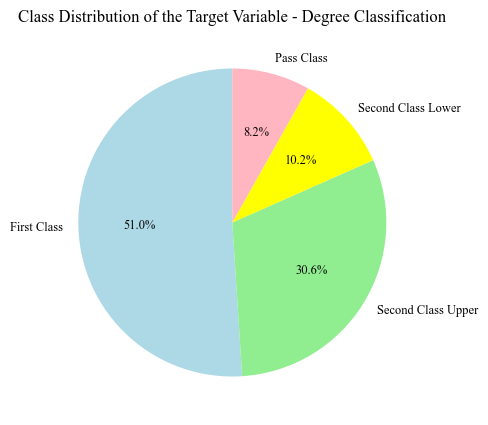

In [186]:
# Data visualization of the class distribution of the Target variable

# Defining the target variable
TargetVariable = "Degree_Classification"

# Plot pie chart
plt.figure(figsize=(5, 5))
AcademicDataframe[TargetVariable].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['lightblue', 'lightgreen', 'yellow', 'lightpink'],
    startangle=90, 
    textprops={'fontsize': 9, 'fontname': 'Times New Roman'}
)

# Customize title font
plt.title(
    "Class Distribution of the Target Variable - Degree Classification", 
    fontsize=12, 
    fontname="Times New Roman"
)

# Hide y-axis label
plt.ylabel("")

# Show plot
plt.show()


In [187]:
# Remove unnecessary columns (Timestamp and Score columns)
if 'Timestamp' in AcademicDataframe.columns:
    AcademicDataframe.drop(columns=['Timestamp'], inplace=True)

if 'Score' in AcademicDataframe.columns:
    AcademicDataframe.drop(columns=['Score'], inplace=True)

# Display the first 5 rows of the modified dataframe
AcademicDataframe.head(5)


,Age_at_Enrollment,Gender,Primary_Secondary_Education_Syllabi,Ordinary_Levels_Results,Ordinary_Levels_Results_Underperformed,Advanced_Levels_Stream,Advanced_Levels_Results,Advanced_Levels_Results_Underperformed,English_Language_Knowledge,Higher_Education,...,Parent/Guardian_Emplyment_Status,Parent/Guardian_Education_Level,Parent/Guardian_Cohabilitation_Status,Average_Household_Income,Accommodation_Type,Transportation_Mode,Travel_Time,Student_Employment_Status,Leisure_Time_Per_Week,Screen_Time_Per_Day
0,18 - 20 years,Female,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Mathematics Stream,Yes,NaN,"No, I did not follow A-Level English or any En...","No, I did not pursue any higher education prio...",...,Both parents/guardians are employed,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Driving / Driven by personal vehicle,1.5 hours to 2 hours,"Yes, full-time employment",Less than 5 hours,2 – 4 hours
1,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Mathematics Stream,Yes,NaN,"Yes, I studied A-Level English","No, I did not pursue any higher education prio...",...,One parent/guardian is employed,Postgraduate education (Master's degree or hig...,Both parents/guardians live together,Prefer not to say,Living with parents/guardians,Public bus / train,1 hour to 1.5 hours,"No, I was not employed",05 – 10 hours,5 – 7 hours
2,24 - 26 years,Female,Local Government Syllabus (Sri Lankan : Tamil),"No, I did not achieve a minimum 'C' pass in on...",Computing,Commerce Stream,Yes,NaN,"Yes, I completed an English course","No, I did not pursue any higher education prio...",...,One parent/guardian is employed,Completed A-Level,Parents/guardians are separated but living ind...,"LKR 100,000 - 300,000",Living with parents/guardians,Driving / Driven by personal vehicle,Less than 30 minutes,"Yes, part-time employment",Less than 5 hours,2 – 4 hours
3,21 - 23 years,Male,Local Government Syllabus (Sri Lankan : English),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Science Stream,No,"physics, chemistry, biology","Yes, I followed both A-Level English and compl...",Foundation Program / Diploma related to Inform...,...,Both parents/guardians are employed,Higher education (Diploma or Bachelor's degree),Both parents/guardians live together,"LKR 300,000 - 500,000",Living with parents/guardians,Public bus / train,More than 2 hours,"No, I was not employed",Less than 5 hours,8 – 10 hours
4,18 - 20 years,Male,Local Government Syllabus (Sri Lankan : Sinhala),"Yes, I achieved a minimum 'C' pass in all thre...",NaN,Mathematics Stream,Yes,NaN,"Yes, I completed an English course",Foundation Program / Diploma related to Inform...,...,Both parents/guardians are employed,Completed A-Level,Both parents/guardians live together,"LKR 100,000 - 300,000",Living with parents/guardians,Uber or other ride-hailing services,Less than 30 minutes,"Yes, part-time employment",05 – 10 hours,5 – 7 hours


In [188]:
# Get basic information about the dataset

AcademicDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Age_at_Enrollment                       49 non-null     object
 1   Gender                                  49 non-null     object
 2   Primary_Secondary_Education_Syllabi     49 non-null     object
 3   Ordinary_Levels_Results                 49 non-null     object
 4   Ordinary_Levels_Results_Underperformed  6 non-null      object
 5   Advanced_Levels_Stream                  49 non-null     object
 6   Advanced_Levels_Results                 44 non-null     object
 7   Advanced_Levels_Results_Underperformed  13 non-null     object
 8   English_Language_Knowledge              49 non-null     object
 9   Higher_Education                        49 non-null     object
 10  Graduation_Year                         49 non-null     int64 
 11  SecondYe

In [189]:
# Define the columns that should be categorical (even though they are numerical)
convert_to_categorical = ['Graduation_Year', 'Degree_Satisfaction', 'Stress_Anxiety_Level_Rating', 'Physical_Health_Rating']

# Convert selected numerical columns to categorical
AcademicDataframe[convert_to_categorical] = AcademicDataframe[convert_to_categorical].astype(str)

# Reassign categorical and numerical variable lists
CategoricalVariables = AcademicDataframe.select_dtypes(include=['object']).columns.tolist()
NumericalVariables = AcademicDataframe.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Variables:", CategoricalVariables)
print("Numerical Variables:", NumericalVariables)


Categorical Variables: ['Age_at_Enrollment', 'Gender', 'Primary_Secondary_Education_Syllabi', 'Ordinary_Levels_Results', 'Ordinary_Levels_Results_Underperformed', 'Advanced_Levels_Stream', 'Advanced_Levels_Results', 'Advanced_Levels_Results_Underperformed', 'English_Language_Knowledge', 'Higher_Education', 'Graduation_Year', 'SecondYear_Average_Grade', 'Internship_Completion', 'Degree_Satisfaction', 'Degree_Classification', 'Stress_Anxiety_Level_Rating', 'Physical_Health_Rating', 'Chronic_Illnesses', 'Parent/Guardian_Emplyment_Status', 'Parent/Guardian_Education_Level', 'Parent/Guardian_Cohabilitation_Status', 'Average_Household_Income', 'Accommodation_Type', 'Transportation_Mode', 'Travel_Time', 'Student_Employment_Status', 'Leisure_Time_Per_Week', 'Screen_Time_Per_Day']
Numerical Variables: []


In [190]:
# Checking for Null values and calculate Null values percentage against the data records
NullValuePercentage = (AcademicDataframe.isnull().sum() / len(AcademicDataframe)) * 100

# Display missing values as a percentage
print("Missing Values Percentage:\n", NullValuePercentage)

Missing Values Percentage:
 Age_at_Enrollment                          0.000000
Gender                                     0.000000
Primary_Secondary_Education_Syllabi        0.000000
Ordinary_Levels_Results                    0.000000
Ordinary_Levels_Results_Underperformed    87.755102
Advanced_Levels_Stream                     0.000000
Advanced_Levels_Results                   10.204082
Advanced_Levels_Results_Underperformed    73.469388
English_Language_Knowledge                 0.000000
Higher_Education                           0.000000
Graduation_Year                            0.000000
SecondYear_Average_Grade                   0.000000
Internship_Completion                      0.000000
Degree_Satisfaction                        0.000000
Degree_Classification                      0.000000
Stress_Anxiety_Level_Rating                0.000000
Physical_Health_Rating                     0.000000
Chronic_Illnesses                          0.000000
Parent/Guardian_Emplyment_Status    

In [191]:
# Duplicate / Redundant data detection, removal and reset of index

AcademicDataframe = AcademicDataframe.drop_duplicates().reset_index(drop=True)
print("Duplicates removed. Updated dataset shape:", AcademicDataframe.shape)


Duplicates removed. Updated dataset shape: (49, 28)


In [192]:
# Display class distribution for each categorical column
for col in CategoricalVariables:
    print(f"Class Balance for {col}:\n{AcademicDataframe[col].value_counts(normalize=True) * 100}\n")


Class Balance for Age_at_Enrollment:
Age_at_Enrollment
18 - 20 years         48.979592
21 - 23 years         20.408163
24 - 26 years         18.367347
Below 18 years         8.163265
26 years and above     4.081633
Name: proportion, dtype: float64

Class Balance for Gender:
Gender
Male      75.510204
Female    24.489796
Name: proportion, dtype: float64

Class Balance for Primary_Secondary_Education_Syllabi:
Primary_Secondary_Education_Syllabi
Local Government Syllabus (Sri Lankan : English)      46.938776
Local Government Syllabus (Sri Lankan : Sinhala)      22.448980
Cambridge International (CIE) or Edexcel (Pearson)    22.448980
Local Government Syllabus (Sri Lankan : Tamil)         6.122449
Other                                                  2.040816
Name: proportion, dtype: float64

Class Balance for Ordinary_Levels_Results:
Ordinary_Levels_Results
Yes, I achieved a minimum 'C' pass in all three subjects                     93.877551
No, I did not achieve a minimum 'C' pass in o

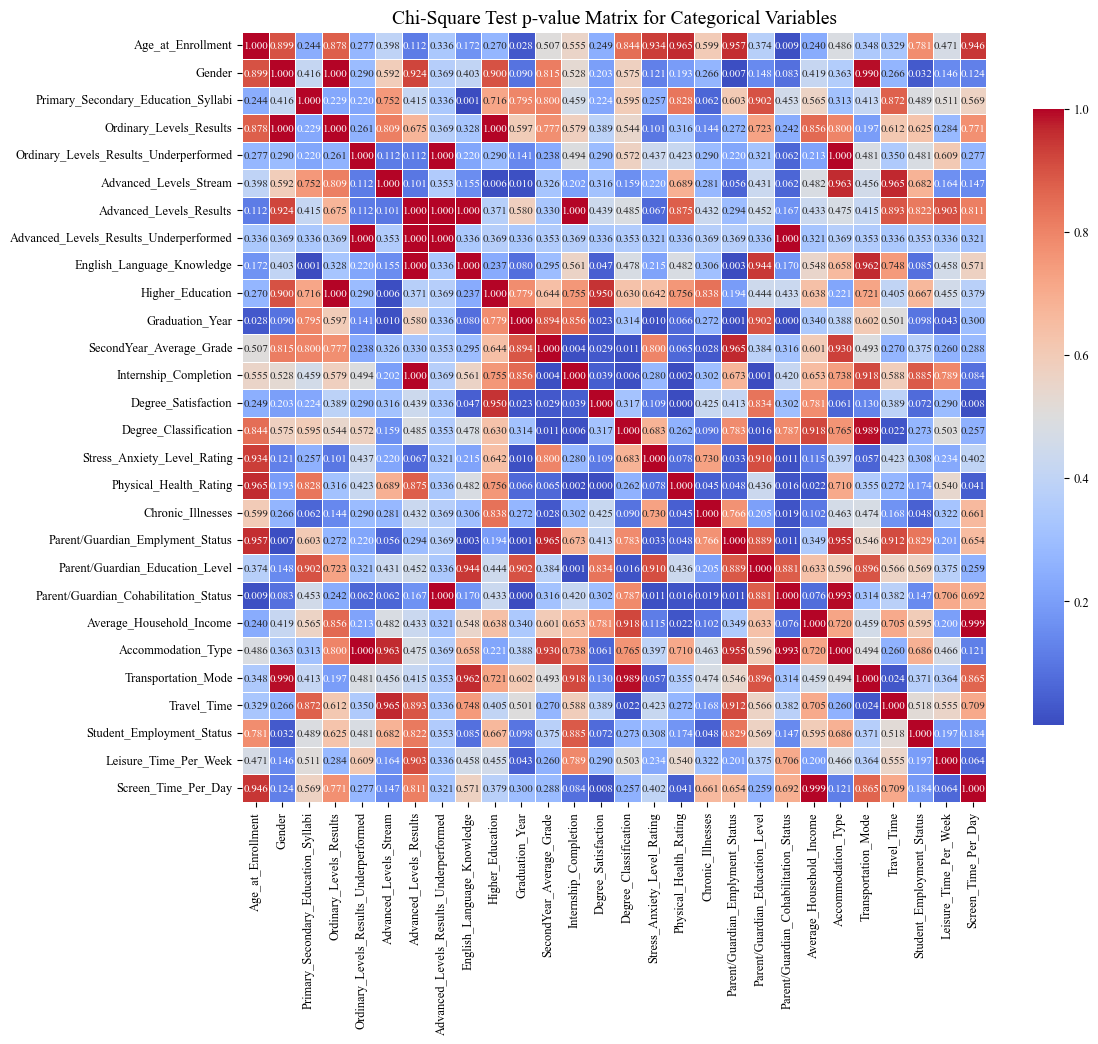

In [193]:
#Chi - Square test and visualization for collinearity check

# Function to calculate Chi-Square test
def chi_square_test(x, y):
    contingency_table = pd.crosstab(x, y)  # Create contingency table
    chi2, p, _, _ = chi2_contingency(contingency_table)  # Perform Chi-Square test
    return p  # Return p-value (indicates statistical significance)

# Create a correlation matrix for categorical variables
chi_matrix = pd.DataFrame(index=CategoricalVariables, columns=CategoricalVariables)

for col1 in CategoricalVariables:
    for col2 in CategoricalVariables:
        if col1 == col2:
            chi_matrix.loc[col1, col2] = 1.0  # Diagonal is 1 (self-correlation)
        else:
            chi_matrix.loc[col1, col2] = chi_square_test(AcademicDataframe[col1], AcademicDataframe[col2])

# Convert values to float for heatmap
chi_matrix = chi_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    chi_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".3f", 
    linewidths=0.5, 
    annot_kws={"size": 8, "fontname": "Times New Roman"},  # Adjust p-value font size
    cbar_kws={"shrink": 0.8}  # Adjust color bar size
)

# Modify color bar font size & style
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=9)  # Change legend font size
for label in cbar.ax.get_yticklabels():
    label.set_fontname("Times New Roman")  # Set legend font to Times New Roman

# Set Times New Roman for title, labels, and ticks
plt.title("Chi-Square Test p-value Matrix for Categorical Variables", fontdict={"fontsize": 14, "fontname": "Times New Roman"})
plt.xticks(fontsize=9, fontname="Times New Roman")
plt.yticks(fontsize=9, fontname="Times New Roman")

plt.show()